In [36]:
import numpy as np
import scipy as sy
import pylab as pyl
import scipy.fftpack as syfp
import matplotlib.pyplot as plt
import scipy.fftpack
%matplotlib inline
from pylab import *
import datetime  ##import function for handling dates
from matplotlib.dates import YearLocator, DateFormatter  ## functions used to plot date axis


In [3]:
matplotlib.rcdefaults()  ##format matplotlib
rc('font', family='Verdana', size=12)

In [4]:
fid=open('trialfile.csv','r') ##open written file
lines=fid.readlines()[0:]     ##read all the rows starting at 1
fid.close()                   ##close file
lines=[l.split(',') for l in lines]    ##define value separated by commas
lines=[[datetime.datetime(int(l[0]),int(l[1]),int(l[2])),float(l[3])] for l in lines]
##result is the date and the corresponding number

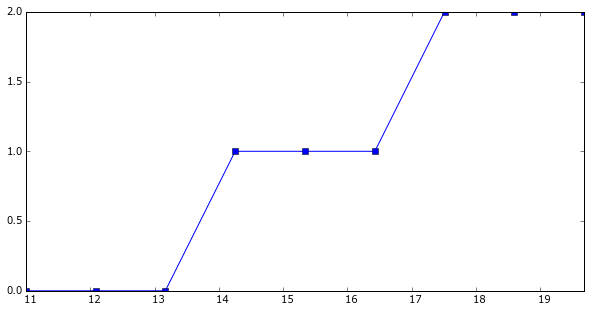

In [11]:
fig=figure(1,figsize=(10,5))  ##creates fig of defined size
fig.clf()                     ##clear figure
dates=[l[0] for l in lines]   ##turns data to 1 dim lists
param1=[l[1] for l in lines]
plt.plot(dates,param1, '-bs', label='MLO')  ##plot date vs parameter, formats strings,MLO used in legend 
plt.show()

In [6]:
##Move on to formatting for radar parameters
c = 3e8        ##define speed of light
Tp = 20e-3     ##pulse time
Trp = .25      ##minimum range profile time duration
N = Tp      ##number of samples per pulse (Tp*frequency)
fstart=2260e6  ##LFM start freq
fstop=2590e6   ##LF stop freq
BW=fstop-fstart ##transmit bandwidth
f= numpy.linspace(fstart, fstop, N/2) ##instantaneous transmit freq

In [ ]:
##inputs are Y, FS, and NBITS
##May need to invert Y 

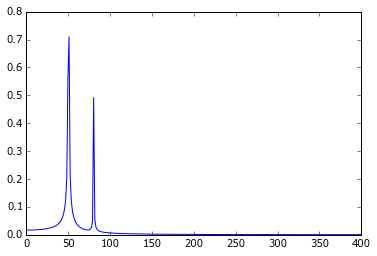

In [9]:
##put data through fast fourier transform
N = 600  ##number of samples
T = 1.0 / 800.0  ##sampling period
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[0:N/2]))

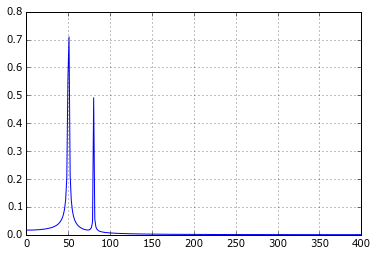

In [13]:
from scipy.fftpack import fft
N = 600  ##number of samples
T = 1.0 / 800.0 ##sampling period
x = np.linspace(0.0, N*T, N) ##return evenly spaced numbers between 0 and 600
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) ##create two sin functions, np.pi is pi and sin 
yf = fft(y)     ## take the fast fourier transform of the two sin functs
xf = np.linspace(0.0, 1.0/(2.0*T), N/2) ##create evenly spaced number array from 0 to 1/2 of the Period 
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2])) ##plot xf vs 2/600*abs(yf) on the positive side only
plt.grid()
plt.show()

In [37]:
##imported data
array = np.loadtxt("book1.csv")  ##read in data from file to an array
print(array)  ##display contents of array

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.]


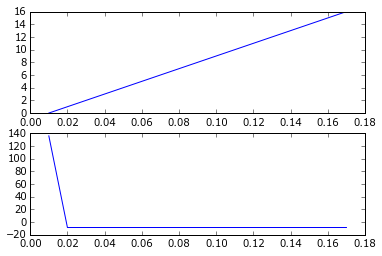

In [44]:
length = len(array)  ##define variable for length of data array
x = sy.linspace(0.01, length*0.01, num=length) ##generate evenly spaced numbers from 0 to the length of the array
fft = sy.fft(array)  ##take fft of the data in the array
freqs = syfp.fftfreq(array.size , d= (x[1]-x[0]))  ##obtain the related frequencies
pyl.subplot(211)
pyl.plot(x,array)
pyl.subplot(212)
pyl.plot(x,fft) ##plot fft vs x
pyl.show()